# Mid Term Project  - Analyzing Information pertaining to the US and its Territories' Educational System

Data source: Public Schools Characteristics - https://catalog.data.gov/dataset/public-school-characteristics-2018-19 
"This dataset is intended for public access and use."

I chose a governmental data set available to the public on education across the US and its Territories. 

The data set focuses on the academic year 2018-2019 only. It is composed of over one hundred thousand cases (i.e. schools or education facilities), across all US States and Territories, for 78 variables (whcih as I explain below) include some repeated information.

I will start by uploading the relevant data I am analyzing as well as the tools needed to analyze it more easily(ie Pandas)- I am also uploading a timer that can measure the time it takes the program to upload the data. 

In [50]:
import time 
import pandas as pd 
import numpy as np

start_time=time.time()
df_ps=pd.read_csv('data_public_school_characteristics_2018-19.csv', index_col='OBJECTID', low_memory=False)

print(time.time() - start_time,'seconds')
df_ps.shape


#This check allowed me to see how long it would take to read the data and 
#how many rows and columns the dataset was composed by
#Also set the column 'OBJECTID' to the index column for the dataframe

#I found the attributes to use from this article: 
#https://towardsdatascience.com/how-to-read-csv-file-using-pandas-ab1f5e7e7b58

1.6509528160095215 seconds


(100719, 78)

## Getting comfortable with the dataframe

I decided to set the maximum number of rows and columns to be displayed here respectively to 999 and 100 so that I could get a view of a significant portion of the Dataframe without always displaying all of the data.

In [119]:
pd.set_option("display.max_rows", 100) 
pd.set_option("display.max_columns", 80) 


To start familiarizing myself with the dataset I decided to use '.describe' (from pandas), to describe the data aggregately. 

The objective was to have a sense of the variables collected and getting an idea of the type of data stored in each column. 
This was intended as a preliminary check given the fact that I am not familiar with the dataset overall (it is the first time I analyze it). 

In [120]:
df_ps.describe(include='object')
#This line of code allowed me to see for each Object type of data in my file
#The count, unique entries
#The objective again is to start cleaning the data by eliminating columns that are unnecessary 
#for example those that are the same across all cases (for example survey year )

#I found reference to this code in our class materials

,School Name,City,State,Grade Span Low,Grade Span High,Virtual,Name of County,Title I,School Type,School Status,School Level,Charter School,Magnet School
count,91492,91492,91492,91492,91492,91492,91492,91492,91492,91492,91492,91492,91492
unique,80211,14369,55,17,18,6,1959,3,1,7,9,3,4
top,Lincoln Elementary School,HOUSTON,CA,PK,5,Not Virtual,Los Angeles County,1-Yes,Regular school,Currently operational,Elementary,No,No
freq,67,720,9149,30780,27920,83229,2046,68445,91492,88900,52621,79741,70643


In order to take a closer look at the variables and start cleaning the data, I started my analysis by taking a closer look at the variables tso that I could highlight those with the most missing values.

As you will see below, there are a number of variables with missing information. 

Given the nature of the data, not all of these missing entries point to missing data. 
In fact, for example, we would expect not to have the data by grade to be fully populated across the dataframe, since the data is collected by educational institution across the US & its Territories. 

In [53]:
# get the number of missing data points per column and add them together so that you have an aggregate count
missing_values_count = df_ps.isnull().sum()

# look at the # of missing data points aggregately by column (ie variable collected)
missing_values_count[:10]

# Ref: DOI 10.5281/zenodo.47063

X           0
Y           0
NCESSCH     0
SURVYEAR    0
STABR       0
LEAID       0
ST_LEAID    0
LEA_NAME    0
SCH_NAME    0
LSTREET1    1
dtype: int64

In order to start deciding which columns to eliminate I had to combine my datascience analysis with gathering information beyond the dataset to identify the meaning of the abbreviations used in the dataframe.

I performed some detective work using this example of institution specific data collected: https://nces.ed.gov/ccd/schoolsearch/school_detail.asp?ID=080345006400 and this search engine https://nces.ed.gov/ccd/schoolsearch/ 


# Data Cleaning - first round 

Based on information gathered beyond the dataframe I was able to select a number of columns to eliminate right away independently of any specific data analysis because they involve codes that are used, either by NCES directly (the National Center for Education Statistics) or by LEAs (Local Education Agencies). 

The variables (ie columns) I decided to eliminate right away included the following information: 
- geolocation of the schools or education facilities
- Survey year (since all of the data refers to the 2018-2019 academic year) 
- X, Y, NCESSCH, STLEAD, LEA_NAME, ULOCALE, and STATUS, because these are codes specific to Local Education Agencies & NCES Analysis
- STABR because this is a school identifier code specific to Local Education Agencies that is repeated in LState
- LSTREET1, LSTREET2, LZIP, LZIP 4, and PHONE, as this gives micro-level information pertaining to the schools (unnecessary for our purposes, since I am not micro analyzing the data)
- I decided to eliminate the columns UG, AE and AS given the the narrow focus I  am giving to the overall analysis of the data
- Member because upon analysis of the data this information is repeated in the Total Enrollment column information, and finally I removed 
- STITLE1 as it extends the classification of Title I schools to the whole building instead of a portion of it.



In [54]:
df_ps['SURVYEAR'].unique()

#I found reference of .nunique instruction in our class materials, 
#then I realized that the "n" in front could be dropped and the code use in this way, so I did 

array(['2018-2019'], dtype=object)

In [55]:
df_ps['SURVYEAR'].nunique()

#gives me the unique number of entries for the column SURVYEAR the year the data is referreing to. 
#This results justifies my decision to elimintae this column from my dataframe (explained below).

1

In [56]:
df_ps.drop(['X', 'Y','NCESSCH','SURVYEAR','STABR','LEAID', 'ST_LEAID','LEA_NAME','LSTREET1','LSTREET2','LZIP','LZIP4','PHONE','MEMBER','ULOCALE','STITLEI','LATCOD','LONCOD','UG','AE','AS','STATUS'], inplace= True, axis=1)

#I think this code was referenced in class material - if not it was the product of a google search 

# Creating a copy of the dataframe and relabeling  the columns

I created a copy of the dataframe to shorten the name and work with this new dataframe called df_ps forward. 

In [57]:
df_ps=df_ps.copy(deep=False)

#I found reference to creating a copy while I was trying to resolve an issue 
#with an error I was getting due to slicing


#https://datacarpentry.org/python-ecology-lesson/03-index-slice-subset/index.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html


I checked that the columns I eliminated were actually eliminated from the dataframe and checked the current dimensions of the dataframe

In [58]:
df_ps.shape



(100719, 56)

Then, in order to make my data more readable I re-names the columns using revealing column names to help myself and any user understand the data 

In [59]:
df_ps.columns = ['School Name', 'City','State','Grade Span Low','Grade Span High','Virtual','Total Free Lunch Eligible','Free Lunch Eligible','Reduced Price Lunch Eligible','Pre-K','K','Grade 1','Grade 2','Grade 3','Grade 4','Grade 5','Grade 6','Grade 7','Grade 8','Grade 9','Grade 10','Grade 11','Grade 12','Grade 13','Tot Enrollment','American Indian/Alaskan Native','Hispanic','Black','White','Hawaian /Pacific Islanders','Two or More Races','Tot Classroom Teachers','Name of County','Student to Teacher Ratio','Title I','American Indian/Alaskan Native Males','American Indian/Alaskan Native Females','Asian Males', 'Asian Females', 'Hispanic Males','Hispanic Females','Black Males', 'Black Females','White Males','White Females','Hawaiian/Pacific Islanders Males','Hawaiian/Pacific Islanders Females','Two or More Races Males','Two or More Races Females','Total Males Enrolled', 'Total Females Enrolled','School Type','School Status','School Level','Charter School','Magnet School'] 


# Taking a second & closer look at the data

Following this, I decided to  describe the type of data included in the dataframe, to have a sense of what data was being viewed as numerical (and what type) and what data was viewed as categorical. 

This alerted me to the fact that I needed to intervene and make sure that grade-specific data was identified as an integer (given the fact that it actually represents discreet values corresponding to number of pupils per grade per institution), and viceversa for example for Grade Span Low and High. 
I thus proceeded in making those variable assignments below, and filling in missing values with 0 for numerical variables. 

In [60]:
df_ps['Grade Span Low']= df_ps['Grade Span Low'].astype(str)

In [61]:
df_ps['Grade Span High']= df_ps['Grade Span High'].astype(str)

In [62]:
#I realized I could assign several columns at one time and it would be faster

df_ps[['School Name','School Type','School Status','School Level','Charter School','Magnet School','Name of County']]=df_ps[['School Name','School Type','School Status','School Level','Charter School','Magnet School','Name of County']].astype(str)

In [63]:
df_ps.fillna(0,method=None, axis=1, inplace=True)

#https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/

In [64]:
df_ps[['Pre-K','K','Grade 1','Grade 2','Grade 3','Grade 4','Grade 5','Grade 6','Grade 7','Grade 8','Grade 9','Grade 10','Grade 11','Grade 12','Grade 13','Tot Enrollment']]= df_ps[['Pre-K','K','Grade 1','Grade 2','Grade 3','Grade 4','Grade 5','Grade 6','Grade 7','Grade 8','Grade 9','Grade 10','Grade 11','Grade 12','Grade 13','Tot Enrollment']].astype(int)

# Continuing to clean the data 

Now I am sure I have numerical data by grade level I can thus use a broad description of the data to look at its distribution, based on the Five Number Summary, which is particulalry effective in highlighting data distribution by quartile. 

At first glance, looking at the ratios of Standard Deviations to Mean for each sub-data set (the Coefficient of Variance), I notice that these ratios are all higher than one, indicating that the variability of the data for each grade seems fairly high. 
This is probably due to the fact that we did not disaggregate the data of the educational institutions by type of institution, meaning for example elementary versus junior high versus high school, or even adult education center. 

This initial analysis draws my attention to the information held in column "Grade 13" - since this is not a typical grade level for US institutions and as you can see below there are only a fraction of institutions with data for this column, I will remove it from the data frame. 


In [65]:
df_ps['Grade 13'].nunique()

#This command gives me the number of institutions within the dataframe that have a unique value for Grade 13
#Clearly this grade level is not typical for US education institutions

43

In [66]:
df_ps['Grade 13'].unique()

#This command tells me which are the unique values that populate the columng "Grade 13"

array([ 0, 73, 67,  5, 41, 30, 17, 19, 28, 15, 22, 23, 40, 29,  4, 14, 45,
       46,  9, 12, 43, 21, 42, 47, 27,  3, 36,  1,  2, 18, 24, 55, 31,  6,
       37,  7, 11, 26, 20, 16, 54, 63, 10])

In [67]:
# Let's filter the rows that have a unique value for G13 out of our dataframe 
#(I sliced the dataframe to find the rows that have a '0' for G13 number of students)

df_ps = df_ps[df_ps['Grade 13']== 0]

#Here I check my data frame 

df_ps.T


OBJECTID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,...,100670,100671,100672,100673,100674,100675,100676,100677,100678,100679,100680,100681,100682,100683,100684,100685,100686,100687,100688,100689,100690,100691,100692,100693,100694,100695,100696,100697,100698,100699,100700,100701,100702,100703,100704,100705,100706,100707,100708,100709,100710,100711,100712,100713,100714,100715,100716,100717,100718,100719
School Name,John Shaw Elementary,Kiita Learning Community,Soldotna Montessori Charter School,Kaleidoscope School of Arts & Science,Marathon School,Whale Pass School,Chatham Correspondence,Denali PEAK,Akutan School,False Pass School,King Cove School,Sand Point School,St George School,St Paul School,Eagle's View Elementary School,Unalaska Jr/Sr High School,Joann A. Alexie Memorial School,Gladys Jung Elementary,Bethel Regional High School,Chaputnguak School,Chief Paul Memorial School,Ayagina'ar Elitnaurvik,Kwigillingok School,Nelson Island Area School,Anna Tobeluk Memorial School,Arviq School,Kuskokwim Learning Academy,Ayaprun Elitnaurvik,Paul T. Albert Memorial School,Akula Elitnaurvik School,Eek School,Lewis Angapak Memorial School,Nuniwarmiut School,William Miller Memorial School,Mikelnguut Elitnaurviat,Ket'acik/Aapalluk Memorial School,Z. John Williams Memorial School,Ayaprun School,Kuinerrarmiut Elitnaurviat,Negtemiut Elitnaurviat School,Qugcuun Memorial School,Rocky Mountain School,Akiuk Memorial School,Bethel Youth Facility,Akiachak School,Tuluksak School,Akiak School,Auntie Mary Nicoli Elementary,Crow Village Sam School,Johnnie John Sr. School,...,Sunset Ridge Intermediate School,Shelton Open Doors,Tukwila Online Learning,Steilacoom PRIDE Academy,Tehaleh Heights Elementary,Camas Elementary,Simcoe Elementary School,West Valley Open Doors,PIKESIDE LEARNING CENTER,BROOKE HANCOCK ALTERNATIIVE LEARNING CTR,FAYETTEVILLE PK-8,VALLEY PK-8,NEW RIVER INTERMEDIATE,NEW RIVER PRIMARY,BROOKE HANCOCK ALTERNATIVE LEARNING CTR,HARRISON COUNTY EVOLUTION ELEMENTARY,CAMMACK CHILDREN?S CENTER,CHAPMANVILLE PRIMARY SCHOOL,CHAPMANVILLE INTERMEDIATE SCHOOL,RIDGEVIEW ELEMENTARY,WETZEL COUNTY TECHNICAL EDUCATION CENTER,Chippewa Valley Correctional Treatment Facililty,Rocketship Southside Community Prep,Arbor Community School,Columbus Intermediate School,Cuba City Middle,Eau Claire Virtual School,Riveredge Outdoor Learning Elementary,eSucceed Charter School,Northeast Wisconsin School of Innovation,Silver Spring Intermediate,Maple Park Charter School,New Visions Charter School,Green Tree Preparatory Academy,Necedah Middle,N-Vision Learning Center,N-Gage Academy,New Auburn Middle,Prairie Ridge Intermediate,Odyssey Academy of Virtual Learning,Eagles' Wings Public Montessori Charter,Sparta Elementary,White Lake Middle,Monroe Elementary School,Munger Mountain Elementary School,Fagali'i Elementary School,Science is Fun and Awesome Learning Academy Ch...,Guahan Academy Charter School,iLearn Academy Charter School,ESCUELA PUBLICA ALIANZA VIMENTI SCHOOL
City,Wasilla,Utqiagvik,Soldotna,Kenai,Kenai,Whale Pass,Angoon,Healy,Akutan,False Pass,King Cove,Sand Point,St George,St. Paul,Unalaska,Unalaska,Atmautluak,Bethel,Bethel,Chefornak,Kipnuk,Kongiganak,Kwigillingok,Toksook Bay,Nunapitchuk,Platinum,Bethel,Bethel,Tununak,Kasigluk,Eek,Tuntutuliak,Mekoryuk,Napakiak,Bethel,Kwethluk,Napaskiak,Newtok,Quinhagak,Nightmute,Oscarville (Kuiggayagaq),Goodnews Bay,Kasigluk,Bethel,Akiachak,Tuluksak,Akiak,Aniak,Chuathbaluk,Crooked Creek,...,Ridgefield,SHELTON,Tukwila,Steilacoom,Bonney Lake,Wapato,Wapato,Yakima,MARTINSBURG,WEIRTON,FAYETTEVILLE,SMITHERS,OAK HILL,OAK HILL,WEIRTON,CLARKSBURG,HUNTINGTON,CHAPMANVILLE,CHAPMANVILLE,SOPHIA,NEW MARTINSVILLE,Chippewa Falls,Milwaukee,Monona,Columbus,Cuba City,Eau Claire,Saukville,Chippewa Falls,Green Bay,Sussex,Lake Geneva,Lake Geneva,Milwaukee,Necedah,Necedah,Necedah,New Auburn,Reedsburg,Ripon,Solon Springs,Sparta,White Lake,Green River,Jackson,P

In [68]:
# I am checking the sliced new data frame size

df_ps.shape



(100635, 56)

In [69]:
#I can safely drop Column "Grade 13" From my data frame
df_ps.drop(columns=['Grade 13'], inplace= True, axis=1)

#Based on everything I have read this warning is not necessary in this case 
#because I actually intend to get rid of the data

# Cleaning the data some more 

I want to repeat the same analysis and operation to cut out any schools that are not part of the traditional school system  (i.e. labeled as Alternative schools or Vocational Schools).
I will address these these "Regular schools" next.

In [70]:
df_ps['School Type'].nunique()

4

In [71]:
df_ps['School Type'].unique()

array(['Regular school', 'Alternative/other school',
       'Special education school', 'Vocational school'], dtype=object)

In [72]:
# Let's filter the rows that have a unique value for School Type that is not "Regular school" out of our dataframe

df_ps = df_ps[df_ps['School Type']=='Regular school']
df_ps.shape

(91492, 55)

In [73]:
df_ps_Reg = df_ps.copy()

All of the Schools remaining in the Dataframe are "Regular Schools" thus we do not need to drop any rows here.

Now as far as the School Status (ie whether the school is operational or not), I chose a different approach. 
Namely I wanted to see the incidence of this type of institution over the overall dataframe.

In [74]:
df_ps_Reg['School Status'].nunique()

7

In [75]:
df_ps_Reg['School Status'].unique()

array(['Currently operational ', 'School temporarily closed',
       'School has reopened', 'New school',
       'School to be operational within two years',
       'School has changed agency',
       'School was operational but not reported last year'], dtype=object)

In [76]:
df_ps_Reg['School Status'].value_counts(dropna=False)

# I actually counted the number of individual unique entries in the data frame currently to decide 
#if I can simply drop some of the rows without worrying about having a significant effect on my data overall

# if I add the schools that are temporarily closed 
#to those who will be operational I only get a total of 483 institutions (483/91492= 0.005)
#Still it is best to remove these institutions 

# I feel like I can safely ignore these schools as their effect on the analysis overall is marginal 

#Note for the schools who did not report, I am assuming that their numbers 
#did not change significantly over one year

Currently operational                                88900
New school                                            1048
School has changed agency                             1011
School to be operational within two years              309
School temporarily closed                              174
School was operational but not reported last year       34
School has reopened                                     16
Name: School Status, dtype: int64

In [77]:
#df_ps_Reg = df_ps_Reg[df_ps_Reg['School Status']!='Regular school']

df_ps_Reg=df_ps_Reg.loc[(df_ps_Reg['School Status']!='School temporarily closed') & (df_ps_Reg['School Status']!='School to be operational within two years')]

df_ps_RegN=df_ps_Reg.copy()

In [78]:
df_ps_Reg.shape

(91009, 55)

# Taking another look at the data to focus our analysis

Now I  have a somewhat more succint dataframe to work with. 

I give it a quick description in order to take a look at the  distribution of values within the dataframe and decide how to proceed with my data analysis.

Immediately one important information comes to light and that is that  some of the data in the column "Total Free Lunch Eligible" is actually negative.

Obviously that raises a red flag and needs to be corrected. 

In addition, however, this data anomaly helps me choose to focus my analysis on how significant this problem of Free Lunch Eligibility really is for the US educational institutions. 

In other words I want to analyze this data using "Total Free Lunch Eligible Students" as a proxy variable to highlight the relative wealth of each State. 

I was trying to find a novel way to analyze the data frame and, at the same time, I wanted to see how much the public education system in the US is really affected by the presence of students from lower income families (Presumably those who would benefit from this type of program). 


In [79]:
df_ps_RegN.describe().round(decimals=2) 

#This was referenced in our class documentation 

,Total Free Lunch Eligible,Free Lunch Eligible,Reduced Price Lunch Eligible,Pre-K,K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,Tot Enrollment,American Indian/Alaskan Native,Hispanic,Black,White,Hawaian /Pacific Islanders,Two or More Races,Tot Classroom Teachers,Student to Teacher Ratio,American Indian/Alaskan Native Males,American Indian/Alaskan Native Females,Asian Males,Asian Females,Hispanic Males,Hispanic Females,Black Males,Black Females,White Males,White Females,Hawaiian/Pacific Islanders Males,Hawaiian/Pacific Islanders Females,Two or More Races Males,Two or More Races Females,Total Males Enrolled,Total Females Enrolled
count,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00,91009.00
mean,270.89,236.43,27.92,14.04,40.55,40.14,40.27,40.86,41.61,42.69,42.81,42.26,41.53,42.99,41.09,38.66,37.80,548.27,5.57,150.21,81.97,256.86,2.26,22.03,33.62,16.47,2.91,2.80,14.79,14.11,76.72,73.51,41.72,40.31,132.38,124.50,1.21,1.14,11.18,10.89,280.91,267.26
std,277.78,257.38,38.15,37.99,48.64,46.99,46.89,47.70,49.63,55.75,87.97,96.49,95.52,125.09,120.58,113.38,111.85,449.95,28.06,245.34,151.50,275.52,21.30,28.60,25.42,41.89,14.29,13.88,44.06,41.54,125.58,120.45,76.52,75.88,140.56,135.74,11.12,10.23,14.49,14.52,229.13,222.65
min,-9.00,-9.00,-9.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-2.00,-2.00
25%,84.00,59.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,286.00,0.00,14.00,3.00,55.00,0.00,4.00,18.60,12.90,0.00,0.00,0.00,0.00,7.00,7.00,1.00,1.00,29.00,26.00,0.00,0.00,2.00,2.00,146.00,138.00
50%,203.00,168.00,18.00,0.00,24.00,25.00,25.00,25.00,24.00,19.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,456.00,1.00,55.00,18.00,195.00,0.00,13.00,28.60,15.40,0.00,0.00,2.00,2.00,28.00,27.00,9.00,8.00,101.00,93.00,0.00,0.00,7.00,6.00,235.00,222.00
75%,375.00,334.00,39.00,15.00,72.00,72.00,72.00,73.00,75.00,75.00,50.00,27.00,26.00,0.00,0.00,0.00,0.00,673.00,3.00,187.00,93.00,362.00,1.00,30.00,41.79,18.20,2.00,2.00,11.00,10.00,95.00,91.00,47.00,46.00,187.00,176.00,1.00,1.00,15.00,15.00,346.00,328.00
max,5004.00,4630.00,1053.00,2163.00,808.00,1572.00,775.00,739.00,763.00,792.00,1181.00,1285.00,1474.00,1876.00,3284.00,1762.00,4054.00,14306.00,1334.00,4270.00,4369.00,10196.00,1301.00,1148.00,1050.00,7950.00,649.00,778.00,2049.00,1508.00,2272.00,2070.00,2054.00,2320.00,4877.00,5319.00,698.00,603.00,501.00,647.00,6733.00,7573.00


# Using the Data Described by the Five Number Summaries to focus our analysis & clean the data some more 

In [80]:
#I decide to remove all of the data collected by race because I will not focus my analysis here 

df_ps_RegN.drop(columns=['American Indian/Alaskan Native Males','American Indian/Alaskan Native Females','Asian Males','Asian Females','Hispanic Males','Hispanic Females','Black Males','Black Females','White Males','White Females','Hawaiian/Pacific Islanders Males','Hawaiian/Pacific Islanders Females','Two or More Races Males','Two or More Races Females'], inplace= True, axis=1)


I start by looking at the Box Plot for the "Total Free Lunch Eligible" students across the educational system and I immediately see that there are some unusual patterns being presented. 

Text(0.5, 1.0, 'Total Free Lunch Eligible Students - Box Plot')

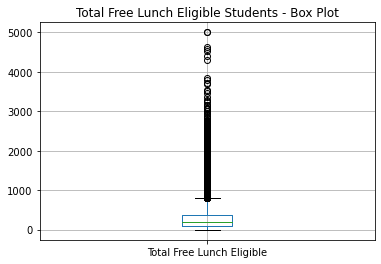

In [81]:
graph=df_ps_RegN.boxplot('Total Free Lunch Eligible')
graph.set_title('Total Free Lunch Eligible Students - Box Plot')

The data is affected  by the presence of negative values but it is also significantly affected by the presence of outliers. 

With this objective in mind, I tried to first analyze the datatframe to see if there were any redundancies deriving from the columns labeled "Total Free Lunch Eligible", versus" "Free Lunch Eligible", versus "Reduced Price Lunch Eligible".

I decided to check if the dataframe provided repeated information in these columns. 

In [82]:
check_df_ps = df_ps_RegN[['Total Free Lunch Eligible','Free Lunch Eligible', 'Reduced Price Lunch Eligible']]
check_df_ps

,Total Free Lunch Eligible,Free Lunch Eligible,Reduced Price Lunch Eligible
OBJECTID,,,
1,205,178,27
3,45,25,20
4,81,58,23
6,17,17,0
7,-9,-9,-9
...,...,...,...
100715,-1,-1,-1
100716,-1,-1,-1
100717,-1,-1,-1


A couple of issues to jump to the forefront of our analysis:
    1) There are negative values in columns where there should not be any 
    2) at first glance the Total column seems to be equal to the sum of the other two columns
I decide to further investigate this in order to decide whether I can maintain in my dataframe only the Total Free Lunch ELigible column and focus my analysis on this column ignoring the other two. (cleaning more columns out of my analysis)

In [83]:

sum_el_plus_red = (check_df_ps['Free Lunch Eligible']+check_df_ps['Reduced Price Lunch Eligible'])

check_df_ps.insert(1, "Check", sum_el_plus_red, True)
check_df_ps

,Total Free Lunch Eligible,Check,Free Lunch Eligible,Reduced Price Lunch Eligible
OBJECTID,,,,
1,205,205,178,27
3,45,45,25,20
4,81,81,58,23
6,17,17,17,0
7,-9,-18,-9,-9
...,...,...,...,...
100715,-1,-2,-1,-1
100716,-1,-2,-1,-1
100717,-1,-2,-1,-1


In [84]:
check_df_ps.shape

(91009, 4)

In [85]:

dups_check_df_ps = check_df_ps[check_df_ps.duplicated(subset=['Total Free Lunch Eligible','Check'], keep=False)]
dups_check_df_ps.shape



(90151, 4)

Given the very high number of rows for which this is true I feel confident that I can eliminate the two columns respectively named "Free Lunch ELigible" and "Reduced Price Lunch Eligible" from my dataframe and focus exclusively on the column "Total Free Lunch Eligible".

In [86]:
df_ps_RegN.drop(['Free Lunch Eligible', 'Reduced Price Lunch Eligible'], inplace= True, axis=1)


Now, in case any of these values did not get caught in the previous check, let’s delete any rows for which Total Free Lunch Eligible value is negative because it does not make sense in the context of these counts


In [87]:

# Get names of indexes for which column has negative value 
indexLunch = df_ps_RegN[ df_ps_RegN['Total Free Lunch Eligible'] <0 ].index
# Delete these row indexes from dataFrame
df_ps_RegN.drop(indexLunch , inplace=True)

#https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

# What does the distribution of the Educational system look like across the US?

Since I am focusing only on Schools or Educational Institution by location on the macro level (ie by State or Territory), I decided to take a quick look at the number of institutions aggregated by State.

I also considered that this analysis is an academic exercise thus I wanted to try to apply different techniques to the dataframe being analyzed so that I could test my abilities in different ways (and learn in the process).

In [88]:
df_ps_RegN['State'].value_counts().head(6)

CA    8901
TX    8038
NY    4575
IL    3952
FL    3442
MI    2913
Name: State, dtype: int64

Visually it may be nice to take a look at these counts to see the distribution of institutions by State.
It does not seem particulrly surprising that some of the larger and more important States in the US have the highest number of educational institutions, however it would be nice to correlate that data with population size (in a future analysis).

Text(0.5, 1.0, 'Bar Graph of US States by Total Number of Educational Institutions (first eleven States)')

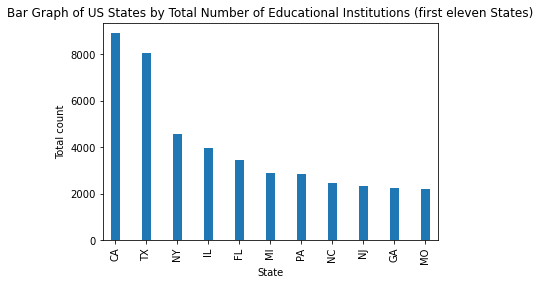

In [89]:
graph_a=df_ps_RegN['State'].value_counts()[:11].plot(kind='bar', width = 0.3)
graph_a.set_xlabel("State")
graph_a.set_ylabel("Total count")
graph_a.set_title('Bar Graph of US States by Total Number of Educational Institutions (first eleven States)')


In [ ]:
# graph_b=df_ps_RegN['State'].value_counts()[12:23].plot(kind='bar', x='State',width = 0.3)
# graph_b.set_xlabel("State")
# graph_b.set_ylabel("Total count")
# graph_b.set_title('Bar Graph of US States by Total Number of Educational Institutions (second eleven States)')

Text(0.5, 1.0, 'Bar Graph of US States by Total Number of Educational Institutions (last States)')

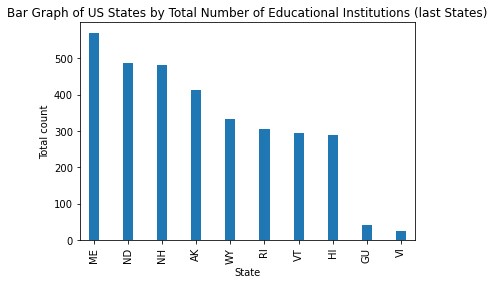

In [90]:
graph_end=df_ps_RegN['State'].value_counts()[40:55].plot(kind='bar', x='State',width = 0.3)
graph_end.set_xlabel("State")
graph_end.set_ylabel("Total count")
graph_end.set_title('Bar Graph of US States by Total Number of Educational Institutions (last States)')

Looking at the same data distribution as a box plot we can see that there are three Satets (California, Texas, and New York) which are the outliers with the highest number of educational institutions, but that overall the data seems to be fairly uniform. 

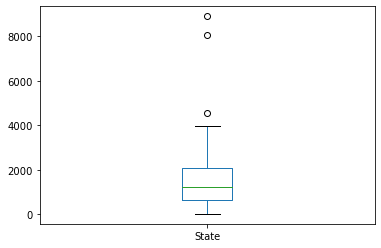

In [91]:
num_inst=df_ps_RegN['State'].value_counts()

grph=num_inst.plot.box()

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.box.html

# An aside dictated by personal curiousity

# Is there a prevalent name associated with educational institutions across the US?

Out of curiousity, and in order to find a novel way to analyze this educational data, I decided to look at educational institutions' names and see if any names were prevalent among the educational institutions in the US and its Territories (obviously focusing on regularinstitutions).



In [92]:
df_ps_RegN['School Name'].value_counts()[:200]
#Counts all the schools with the same name to check on the most common names

Lincoln Elementary School       65
Lincoln Elementary              57
Jefferson Elementary            51
Washington Elementary           48
Washington Elementary School    46
                                ..
Oak Grove Elementary             8
Meadowlark Elementary            8
Lincoln High School              8
WASHINGTON ELEMENTARY            8
Park Elementary                  8
Name: School Name, Length: 200, dtype: int64

Text(0.5, 1.0, 'Bar Graph of Common Names of Educational Institutions')

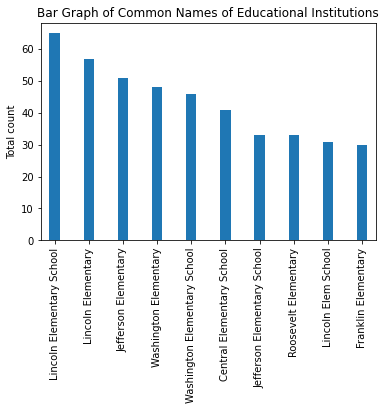

In [93]:
#top 10 school names in the US and territories 
graph1=df_ps_RegN['School Name'].value_counts()[:10].plot(kind='bar', x='School Name', width=0.3)
graph1.set_ylabel("Total count")
graph1.set_title('Bar Graph of Common Names of Educational Institutions')



From the analysis above and the bar graph used to present the data, it is immediately apprent that many institutions have very similar names. 

To make this graph meaningful I want to aggregate the names of the schools by dropping all common identifiers of the schools such as charter, elementary, high, academy etc.

Parsing the names this way will allow us to re-organize the data and bring to light the truly common features of these institutions' names.

In [94]:

new_df_ps_Reg=df_ps_RegN
new_df_ps_Reg["School Name"]=new_df_ps_Reg["School Name"].replace(['Elementary School', 'Elementary','Charter School','Learning Academy','Center', 'Montessori','Middle','Middle School','EL','Elem','HIGH','SCHOOL','High','High School','School','Learning Community'], "", regex = True).str.strip()

#https://www.geeksforgeeks.org/python-pandas-series-str-replace-to-replace-text-in-a-series/

Text(0.5, 1.0, 'Bar Graph of True Common Names of Educational Institutions')

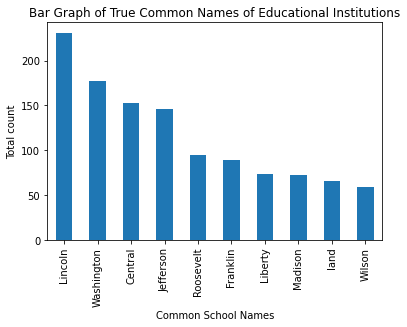

In [95]:
#top 10 school names in the US and territories 
graph2=new_df_ps_Reg['School Name'].value_counts()[:10].plot(kind='bar')
graph2.set_xlabel("Common School Names")
graph2.set_ylabel("Total count")
graph2.set_title('Bar Graph of True Common Names of Educational Institutions')

#https://pandas.pydata.org/docs/user_guide/visualization.html

# How many students across the USA are eligible for Free and/or Reduced Lunches? 

Setting aside this small parenthesis of personal curiosity, it would be interesting to go back to our "Total Free Lunch Eligible" students and compare this data by State. 

Let's pull this data from the dataframe.

In [96]:
free_lunch_by_state=df_ps_RegN[['State','Total Free Lunch Eligible']]
free_lunch_by_state.head()

,State,Total Free Lunch Eligible
OBJECTID,,
1,AK,205
3,AK,45
4,AK,81
6,AK,17
8,AK,3


In [97]:
free_lunch_by_state.shape

(83996, 2)

The new dataframe which is a slice of our "df_ps_Reg" above needs however to be further cleaned up to aggregate the State data together. 

In addition, ounce aggregated showing this data in a Box Plot makes more sense. 

In [98]:
ts=free_lunch_by_state.groupby('State').sum()

#creating a new slice of the df with name ts for (total sum) where I am going 
#to see the aggregate values of Total Free  lunch students by State ordered in dewscending order by number 


ts.sort_values(by='Total Free Lunch Eligible', ascending = False).head(10)

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

,Total Free Lunch Eligible
State,
CA,3563945
TX,3236012
FL,1537208
NY,1388822
GA,1064265
IL,951692
PA,861332
NC,856291
MI,692648


The Box Plot of this data makes a lot more sense. 
The outliers in total number of Free Eligible Lunches by State are identified in the following five States: 
Georgia, California, Texas, Florida, and New York.

However, at a closer look this data  representation still presents a problem: it does not account for the relative size of each State's educational system. 

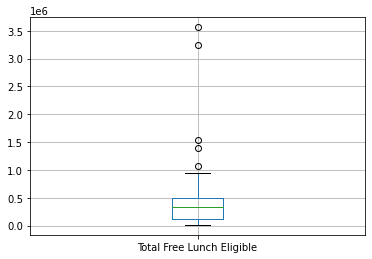

In [99]:
graph=ts.boxplot('Total Free Lunch Eligible')




# Is this data a good indicator of relative wealth by State?

We should now look at the ratios of Total Free Lunch Eligible Students to Relative size of the Schooling system by State (as counted by the total student population enrollement). 

This ratio would give us a sense - by State - of how much Free Lunch Eligible students weigh on the overall student population and it could give us a sense of the relative wealth of that specific education system by State. 

Pursuing this objective, I 
1) aggregate Total Free Lunch Eligible students by state, then
2) Show the bar graph of this information 
3) I extract and aggregate the Total Student Enrollment levels by State
4) I compare this data on a side-by-side Bar Graph, and finally
5) I find the ratio of incidence of Free Lunch ELigible Students over the Total Student Population


Step 1 

Here I sort and aggregate by State the rows of dataframe by column 'Total Free Lunch Eligible'

I thus can see which State has the most number of reported pupils eligible for getting free meals I use this as an indicator of poverty

In [100]:
ts = ts.sort_values(by ='Total Free Lunch Eligible' , ascending=False)

In [101]:
ts.head(5)

,Total Free Lunch Eligible
State,
CA,3563945
TX,3236012
FL,1537208
NY,1388822
GA,1064265


Step 2 - Build a Bar Graph with this information

Text(0.5, 1.0, 'Total Free Lunch Eligible Students By State (Top ten States)')

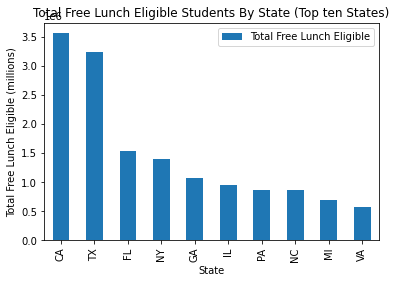

In [102]:
graph3=ts[:10].plot(kind='bar')
graph3.set_xlabel("State")
graph3.set_ylabel("Total Free Lunch Eligible (millions)")
graph3.set_title('Total Free Lunch Eligible Students By State (Top ten States)')


Step 3 

Creating a new slice of the data frame that grabs State codes and the Total Enrollment as a proxy of State Education Size and aggregates this data by State code 

In [103]:
edu_size_by_state=df_ps_RegN[['State','Tot Enrollment']]

tot_edu_size=edu_size_by_state.groupby('State').sum()

Order the aggregate sums by State in Ascending order

In [104]:
tot_edu_size=tot_edu_size.sort_values(by='State', ascending = True)

In [105]:
tot_edu_size.head(5)

,Tot Enrollment
State,
AK,104230
AL,736679
AR,491003
AZ,993102
CA,6016506


Step 4

Make sure that both dataframes are ordered by the same State code so that the dataframes match by index

In [106]:
ts = ts.sort_values(by ='State' , ascending=True)

In [107]:
ts.head(5)

,Total Free Lunch Eligible
State,
AK,44265
AL,406095
AR,314235
AZ,538693
CA,3563945


Step 5 

Merge the two dataframes so that we can see the information side by side  and then compare it graphically

In [108]:
new_ts=pd.concat([ts, tot_edu_size], axis=1)


In [109]:
new_ts.head(5)

,Total Free Lunch Eligible,Tot Enrollment
State,,
AK,44265,104230
AL,406095,736679
AR,314235,491003
AZ,538693,993102
CA,3563945,6016506


Step 6

Graph for comparison of Total Free Lunches to Total Enrollment 

Text(0.5, 1.0, 'Side-by-Side Bar Graph Free Lunch Eligible vs Enrollment by State (Top Ten)')

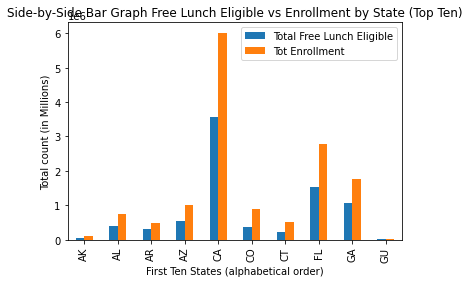

In [110]:
graph5=new_ts[:10].plot(kind='bar')
graph5.set_xlabel("First Ten States (alphabetical order)")
graph5.set_ylabel("Total count (in Millions)")
graph5.set_title('Side-by-Side Bar Graph Free Lunch Eligible vs Enrollment by State (Top Ten)')


Here I decided to find a ratio to actually see the relative importance

In [111]:
new_ts['Ratio of TotFreeLunch/TotEnrol']= (new_ts['Total Free Lunch Eligible']/new_ts['Tot Enrollment']).round(decimals=2) 

In [112]:
new_ts.head(5)

,Total Free Lunch Eligible,Tot Enrollment,Ratio of TotFreeLunch/TotEnrol
State,,,
AK,44265,104230,0.42
AL,406095,736679,0.55
AR,314235,491003,0.64
AZ,538693,993102,0.54
CA,3563945,6016506,0.59


Ordering the data based on the highest % of Tot Free Lunch by State Education size

In [113]:
new_ts=new_ts.sort_values(by ='Ratio of TotFreeLunch/TotEnrol' , ascending=False)

In [114]:
new_ts.head(5)

,Total Free Lunch Eligible,Tot Enrollment,Ratio of TotFreeLunch/TotEnrol
State,,,
VI,10643,10718,0.99
PR,259680,285988,0.91
GU,25436,29590,0.86
MS,351132,473576,0.74
NM,246886,337652,0.73


Now re-graphing this information to have a better sense of relative numbers of free lunches per State

Text(0.5, 1.0, 'Free Lunch Eligible by State Education Size (Top Ten)')

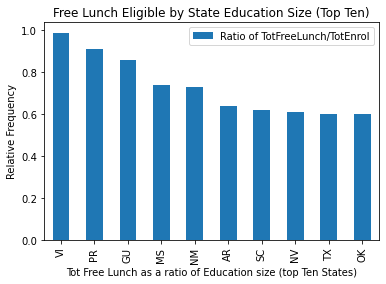

In [115]:
graph6=new_ts[:10].plot.bar(y='Ratio of TotFreeLunch/TotEnrol')
graph6.set_xlabel("Tot Free Lunch as a ratio of Education size (top Ten States)")
graph6.set_ylabel("Relative Frequency")
graph6.set_title('Free Lunch Eligible by State Education Size (Top Ten)')


At closer look, it seems that US Territories Virgin Islands, Puerto Rico, and Guam, have the highest ratios. There could be some interesting policy analysis to do along side these results.

If can take these Territories out of the graph to focus on the Continental USA, we have the picture below.

Text(0.5, 1.0, 'Free Lunch Eligible by State Education Size (Top Ten)')

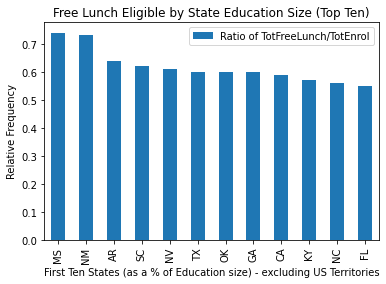

In [116]:
graph7=new_ts[3:15].plot.bar(y='Ratio of TotFreeLunch/TotEnrol')
graph7.set_xlabel("First Ten States (as a % of Education size) - excluding US Territories")
graph7.set_ylabel("Relative Frequency")
graph7.set_title('Free Lunch Eligible by State Education Size (Top Ten)')

Text(0.5, 1.0, 'Free Lunch Eligible by State Education Size (15th-25th States)')

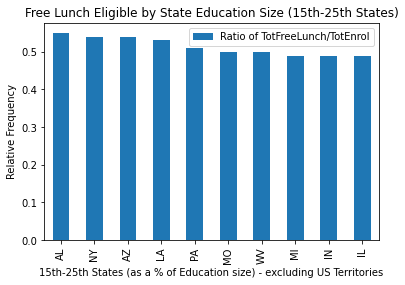

In [117]:
graph8=new_ts[15:25].plot.bar(y='Ratio of TotFreeLunch/TotEnrol')
graph8.set_xlabel("15th-25th States (as a % of Education size) - excluding US Territories")
graph8.set_ylabel("Relative Frequency")
graph8.set_title('Free Lunch Eligible by State Education Size (15th-25th States)')

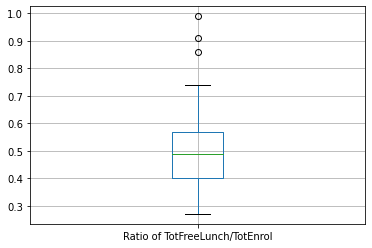

In [118]:
graph9=new_ts.boxplot('Ratio of TotFreeLunch/TotEnrol')

# Conclusions

In summary, the ratios of Free Lunch Eligible Students to Education Size (by State) seem to be fairly normally distributed - at least for the 2018-2019 academic year (once the outliers of the Virgin Islands, Puerto Rico, and Guam are eliminated from our analysis. 

The values overall seem to be fairly high with the 75% of all US States with a ratio above 40%
Considering that the USA is one of the richest countries in the world, there is room for policy debate. 



# What I learned through this first experience with Data Science

I have to admit that this analysis has been very demanding, in part because I am still learning how to use Python, Pandas, and in general programming.

If I had to summarize how I would approach the task differently next time, I would start by deciding early what the narrow focus of the analysis is going to be. 
Making these decisions early would have allowed me to eliminate a greater number of columns and rows from the start, even before applying any programming  techniques to the overall dataframe. 
This would probably save a tremendous amount of time and angst. 

I realize how much there is still to learn on the best ways to manipulate the data part of your dataframe and, now I understand better what was meant by "Do not take notes!" since  writing the correct programming instructions can really depend on the specific case and, google (and pandas libraries, among other resources!) are always available to lend a hand. 

It has been a very frustrating, challenging, time-consuming, generally exhausting, yet amazingly satisfying and rewarding process. (I am terrified of what the Final might look like!):-) 

